# K-NN in python: search for the best k

## 1- Load the required modeules

In [4]:
import numpy as np                     # Llibreria matemÃƒÂ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃƒÂ©s facilment el dataset digits
import pandas as pd
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline                     

## 2- Load the data

In [5]:
# Load digits dataset
data = pd.read_csv('C:/Users/scann/OneDrive/Desktop/prox_Data.csv', sep=',', encoding='Windows-1252')
# Separate data from labels
data = pd.DataFrame(data)
y = data.iloc[:,[9]]
y = np.ravel(y)
X = data.iloc[:,[1,2,3,4,5,6,7,8]]

print(data)
print (y)
#print(X)

     Pos    FG%   3P  3PA    2P%   eFG%  ORB   TRB  BLK  Proximity
0      0  0.439  0.8  2.1  0.468  0.486  2.0   6.5  0.6          0
1      0  0.547  0.0  0.0  0.548  0.547  4.6  10.0  0.8          0
2      0  0.557  0.0  0.1  0.562  0.557  2.4  10.1  0.8          0
3      1  0.402  0.2  1.5  0.560  0.424  1.0   2.7  0.3          0
4      0  0.550  0.3  1.0  0.578  0.566  1.6   5.5  1.0          0
..   ...    ...  ...  ...    ...    ...  ...   ...  ...        ...
789    1  0.465  0.7  1.7  0.495  0.524  1.5   4.4  0.4          0
790    3  0.460  3.1  8.0  0.512  0.536  0.7   3.7  0.1          1
791    0  0.526  0.0  0.2  0.547  0.528  1.5   5.3  0.4          0
792    0  0.567  0.0  0.1  0.593  0.567  1.9   4.6  0.2          0
793    0  0.626  0.0  0.0  0.626  0.626  2.9   8.5  1.0          0

[794 rows x 10 columns]
[0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 

## 3- Simple cross-validation

In [6]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))



0.7740585774058577


In [7]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[ 49  32]
 [ 22 136]]


In [8]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        81
           1       0.81      0.86      0.83       158

    accuracy                           0.77       239
   macro avg       0.75      0.73      0.74       239
weighted avg       0.77      0.77      0.77       239



### Let's build a one by hand to see prediction

## 4- Let's do a 10-fold cross-validation

In [9]:
# Method 1
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.7625     0.8375     0.7875     0.7375     0.7721519  0.79746835
 0.81012658 0.87341772 0.83544304 0.7721519 ]


In [10]:
# Let's get the mean of the 10 validations (and standard deviation of them)
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.7985759493670885
0.03893723405433358


In [11]:
# Method 2
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[188  94]
 [ 66 446]]
0.7984886649874056


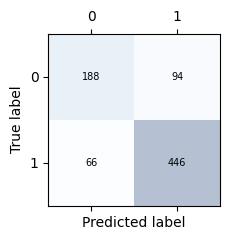

In [12]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

In [13]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        81
           1       0.81      0.86      0.83       158

    accuracy                           0.77       239
   macro avg       0.75      0.73      0.74       239
weighted avg       0.77      0.77      0.77       239



### [Optional] Let's see how ammount of training data influences accuracy 

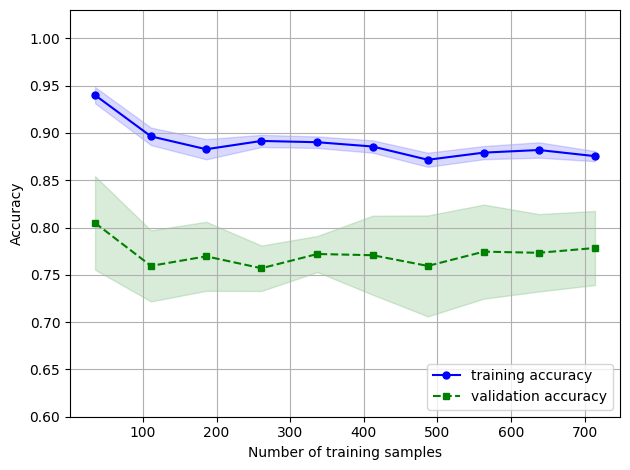

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=3),
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.03])
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## 5- Finding parameters for k-NN

In [15]:
# See parameters in
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

Accuracy 1 neighbour: 0.785487012987013
Accuracy 3 neighbours: 0.8071428571428572
Accuracy 5 neighbours: 0.8124675324675324
Accuracy 7 neighbours: 0.8214935064935064
Accuracy 9 neighbours: 0.8250324675324675


In [16]:
# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbour: and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour: and distance weighting: 0.785487012987013
Accuracy 3 neighbour: and distance weighting: 0.8071428571428572
Accuracy 5 neighbour: and distance weighting: 0.8107142857142857
Accuracy 7 neighbour: and distance weighting: 0.8215584415584416
Accuracy 9 neighbour: and distance weighting: 0.8233116883116883


### Authomatically find best parameters:

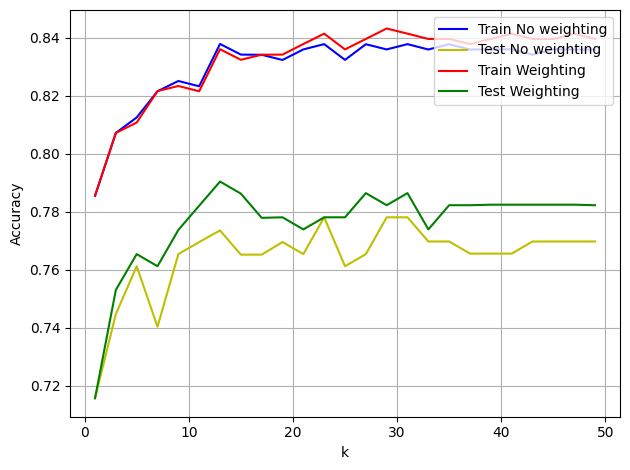

In [39]:
lr = []
for ki in range(1,50,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,50,2),lr,'b',label='Train No weighting')

lr = []
for ki in range(1,50,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_test, y=y_test, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,50,2),lr,'y',label='Test No weighting')

lr = []
for ki in range(1,50,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,50,2),lr,'r',label='Train Weighting')

lr = []
for ki in range(1,50,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_test, y=y_test, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,50,2),lr,'g',label='Test Weighting')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

### Do the same using Grid Search method in python

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,50,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
#clf.fit(X_test, y_test)
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 13, 'weights': 'distance'} Accuracy= 0.7903985507246377


Apply models with best parameters found trained with all training data to the test set

In [21]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))

[[ 52  29]
 [ 13 145]]
0.8242677824267782


In [22]:
# interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.824 +/- 0.048


(0.7760164847424902, 0.8725190801110663)

In [23]:
#Using Binomial distribution

proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.7702500261379118, 0.8687427797705162)

### Mcnemar's Test implementation

In [24]:
# Build two classifiers

# Classifier 1 (3 Neighbours) successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=3), X=X, y=y,  cv=10) 
res1=np.zeros(y.shape)
res1[y_pred==y]=1

# Classifier 2 (7 Neighbours) 2 successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=7), X=X, y=y,  cv=10) 
res2=np.zeros(y.shape)
res2[y_pred==y]=1

# Build contingency matrix
n00 = np.sum([res1[res2==1]==1])
n11 = np.sum([res1[res2==0]==0])
n10 = np.sum([res1[res2==1]==0])
n01 = np.sum([res1[res2==0]==1])

# Chi -square test
print("Have the classifiers significant different accuracy?:",(np.abs(n01-n10)-1)**2/(n01+n10)>3.84)

Have the classifiers significant different accuracy?: True


### Take a look to the errors in test set

In [25]:
testerrors=[i for i,k in enumerate(pred) if k!=y_test[i]]
plt.gray()
plt.ion
for i in testerrors:
    plt.matshow(X_test[i].reshape(8,8))
    plt.xticks([]); plt.yticks([]);
    print("Guess:", pred[i],"Reality:",y_test[i])
    plt.show()

KeyError: 4

<Figure size 640x480 with 0 Axes>

# Exercises:

### Do a 10-fold Cross-Validation using Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)

# No parameters to tune

clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

[[ 49  32]
 [ 13 145]]

Accuracy: 0.8117154811715481

              precision    recall  f1-score   support

           0       0.79      0.60      0.69        81
           1       0.82      0.92      0.87       158

    accuracy                           0.81       239
   macro avg       0.80      0.76      0.78       239
weighted avg       0.81      0.81      0.80       239



(0.7576275561960222, 0.8583262443371569)

### Reproduce in Rapidminer

In [27]:
# Export data to Rapidminer

import pandas as pd 
#df = pd.DataFrame(np.c_[ digits.data, digits.target])
df = data
df.to_csv("digits2.csv",index=False)

# Go to Rapidminer and load the data set. Reproduce grid Search there and report results on the test set

### Play with noise

In [28]:
# Lets' add noise to data: 64 new columns with random data
nrcols=64
col = np.random.randint(0,17,(X_train.data.shape[0],nrcols))
col

AttributeError: 'DataFrame' object has no attribute 'data'

In [29]:
Xr=np.hstack((X_train,col))
Xr

NameError: name 'col' is not defined

In [29]:
col = np.random.randint(0,17,(X_test.data.shape[0],nrcols))
Xr_test=np.hstack((X_test,col))

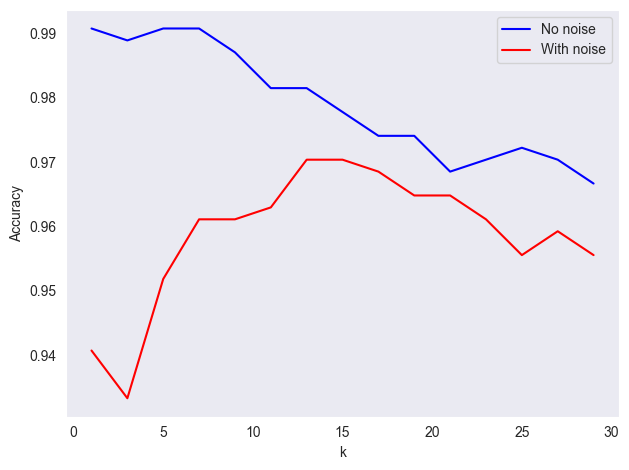

In [30]:
lr = []
for ki in range(1,30,2):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    knc.fit(X_train, y_train)
    lr.append(knc.score(X_test, y_test))         
plt.plot(range(1,30,2),lr,'b',label='No noise')

lr = []
for ki in range(1,30,2):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    knc.fit(Xr, y_train)
    lr.append(knc.score(Xr_test, y_test))  
plt.plot(range(1,30,2),lr,'r',label='With noise')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

fs = SelectKBest(mutual_info_classif, k=64).fit(Xr, y_train) #chi2
X_new = fs.transform(Xr)
Xtr_new = fs.transform(Xr_test)

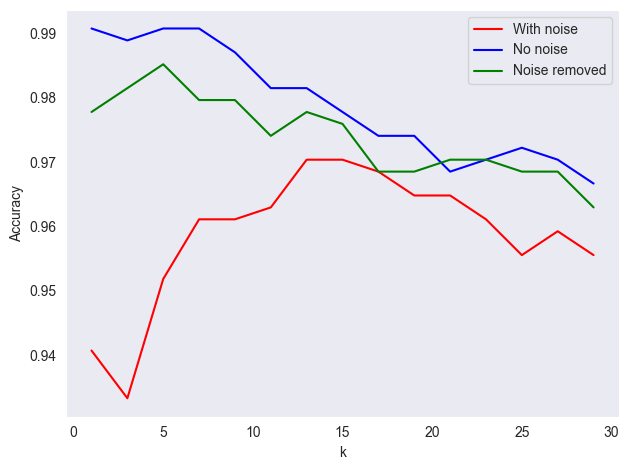

In [32]:
lr = []
for ki in range(1,30,2):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    knc.fit(Xr, y_train)
    lr.append(knc.score(Xr_test, y_test))    
plt.plot(range(1,30,2),lr,'r',label='With noise')

lr = []
for ki in range(1,30,2):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    knc.fit(X_train, y_train)
    lr.append(knc.score(X_test, y_test))   
plt.plot(range(1,30,2),lr,'b',label='No noise')

lr = []
for ki in range(1,30,2):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    knc.fit(X_new, y_train)
    lr.append(knc.score(Xtr_new, y_test))   
plt.plot(range(1,30,2),lr,'g',label='Noise removed')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

### Change the scorer function

In [30]:
#Let's try to optimize parameters for precision of class "9"

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1,scoring="accuracy") 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))

print('Precision for "9": %.3f' % precision_score(y_true=y_test, y_pred=pred,average='macro',labels=[9]))

Best Params= {'n_neighbors': 29, 'weights': 'distance'} Accuracy= 0.8431168831168832
[[ 52  29]
 [ 13 145]]
0.8242677824267782
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        81
           1       0.83      0.92      0.87       158

    accuracy                           0.82       239
   macro avg       0.82      0.78      0.79       239
weighted avg       0.82      0.82      0.82       239

Precision for "9": 0.000


C:\Users\scann\DataspellProjects\MD\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Precison of class 9 is low compared with others. 
# Assume precision of "9" is critical. Let's change optimize parameters by defining precision for 9.

scorer = make_scorer(precision_score,average='macro',labels=[9])
#scorer = make_scorer(score_func=precision_score, pos_label=9, greater_is_better=True,average='micro')


params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1,scoring=scorer) 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Precision=", clf.best_score_)

parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))


Best Params= {'n_neighbors': 1, 'weights': 'distance'} Precision= 0.0
[[ 53  28]
 [ 32 126]]
0.7489539748953975
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        81
           1       0.82      0.80      0.81       158

    accuracy                           0.75       239
   macro avg       0.72      0.73      0.72       239
weighted avg       0.75      0.75      0.75       239



In [32]:
testerrors=[i for i,k in enumerate(pred) if k!=y_test[i]]
plt.gray()
plt.ion
for i in testerrors:
    #plt.matshow(X_test[i].reshape(8,8))
    #plt.xticks([]); plt.yticks([]);
    print("Guess:", pred[i],"Reality:",y_test[i])
    plt.show()

Guess: 1 Reality: 0


<Figure size 640x480 with 0 Axes>

Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 1 Reality: 0
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
Guess: 0 Reality: 1
